In [51]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import NMF


#Librerias para visualizacion
import seaborn as sb
import matplotlib.pyplot as plt

In [33]:
labels_training = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp/labels_training_set.csv',
                              low_memory= False)
features = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp/exp_features.csv', 
                              low_memory= False)
kaggle_df = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp/trocafone_kaggle_test.csv', 
                              low_memory= False)

In [34]:
features.head()

,Unnamed: 0,person,cantidad de conversiones,cantidad de veces que vio un producto,cantidad de visitas a la pagina,cantidad de checkouts,visitaron el sitio entre las 13hs y 24hs,cantidad de vistas del J5,cantidad de vistas del iphone 5s,cantidad de vistas del samsung s6 flat,cantidad de vistas del iphone 6,cantidad de vistas del iphone 6s,cantidad de vistas entre semana
0,0,4886f805,NaN,4.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0
1,1,ad93850f,NaN,20.0,5.0,1.0,4.0,NaN,17.0,NaN,NaN,NaN,5.0
2,2,0297fc1e,NaN,404.0,95.0,7.0,64.0,NaN,1.0,NaN,213.0,213.0,81.0
3,3,2d681dd8,NaN,13.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0
4,4,cccea85e,NaN,739.0,22.0,1.0,18.0,NaN,2.0,1.0,NaN,NaN,20.0


In [35]:
# Random Forests  tolera NaN
# features['cantidad de conversiones'].fillna(0, inplace=True)
# features['cantidad de veces que vio un producto'].fillna(0, inplace=True)
# features['cantidad de visitas a la pagina'].fillna(0, inplace=True)
# features['cantidad de checkouts'].fillna(0, inplace=True)
# features['visitaron el sitio entre las 13hs y 24hs'].fillna(0, inplace=True)
# features['cantidad de vistas del J5'].fillna(0, inplace=True)
# features['cantidad de vistas del iphone 5s'].fillna(0, inplace=True)
# features['cantidad de vistas del samsung s6 flat'].fillna(0, inplace=True)
# features['cantidad de vistas del iphone 6'].fillna(0, inplace=True)
# features['cantidad de vistas del iphone 6s'].fillna(0, inplace=True)
# features['cantidad de vistas entre semana'].fillna(0, inplace=True)

In [46]:
persons = pd.DataFrame()
persons['persons'] = features['person']
persons.head()

,persons
0,4886f805
1,ad93850f
2,0297fc1e
3,2d681dd8
4,cccea85e


In [47]:
features.drop(['person'], axis= 1, inplace= True)
features.head()

,Unnamed: 0,cantidad de conversiones,cantidad de veces que vio un producto,cantidad de visitas a la pagina,cantidad de checkouts,visitaron el sitio entre las 13hs y 24hs,cantidad de vistas del J5,cantidad de vistas del iphone 5s,cantidad de vistas del samsung s6 flat,cantidad de vistas del iphone 6,cantidad de vistas del iphone 6s,cantidad de vistas entre semana
0,0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0.0,20.0,5.0,1.0,4.0,0.0,17.0,0.0,0.0,0.0,5.0
2,2,0.0,404.0,95.0,7.0,64.0,0.0,1.0,0.0,213.0,213.0,81.0
3,3,0.0,13.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,0.0,739.0,22.0,1.0,18.0,0.0,2.0,1.0,0.0,0.0,20.0


In [48]:
features.drop(['Unnamed: 0'], axis= 1, inplace= True)
features.head()

,cantidad de conversiones,cantidad de veces que vio un producto,cantidad de visitas a la pagina,cantidad de checkouts,visitaron el sitio entre las 13hs y 24hs,cantidad de vistas del J5,cantidad de vistas del iphone 5s,cantidad de vistas del samsung s6 flat,cantidad de vistas del iphone 6,cantidad de vistas del iphone 6s,cantidad de vistas entre semana
0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,20.0,5.0,1.0,4.0,0.0,17.0,0.0,0.0,0.0,5.0
2,0.0,404.0,95.0,7.0,64.0,0.0,1.0,0.0,213.0,213.0,81.0
3,0.0,13.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,739.0,22.0,1.0,18.0,0.0,2.0,1.0,0.0,0.0,20.0


In [59]:
nmf = NMF(n_components= 2, init='random',random_state=1982,alpha=0.0002, beta_loss='frobenius', max_iter=5000)

In [55]:
matriz_features = np.matrix(features)

In [56]:
matriz_features

matrix([[  0.,   4.,   1., ...,   0.,   0.,   1.],
        [  0.,  20.,   5., ...,   0.,   0.,   5.],
        [  0., 404.,  95., ..., 213., 213.,  81.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [60]:
P = nmf.fit_transform(matriz_features) 
Q = nmf.components_

In [64]:
matriz_factorizada = np.matrix(P @ Q)

In [65]:
# Error del modelo
nmf.reconstruction_err_

3204.236404029739

In [67]:
matriz_factorizada_df = pd.DataFrame(matriz_factorizada)

In [68]:
matriz_factorizada_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.012246,4.173003,0.460680,0.075169,0.330923,0.051473,0.196645,0.088076,0.000000,0.000000,0.362159
1,0.053093,21.502623,2.144505,0.398775,1.526674,0.223161,2.057478,0.381857,2.639828,2.639828,1.679607
2,0.504136,415.139942,29.469066,8.294542,20.183960,2.118978,94.071080,3.625847,188.362517,188.362517,22.719093
3,0.038451,13.102718,1.446480,0.236022,1.039058,0.161617,0.617442,0.276548,0.000000,0.000000,1.137136
4,2.123637,723.656498,79.888345,13.035373,57.386643,8.926049,34.101022,15.273627,0.000000,0.000000,62.803440


In [69]:
matriz_factorizada_df['person'] = persons['persons']

In [70]:
matriz_factorizada_df.head()

,0,1,2,3,4,5,6,7,8,9,10,person
0,0.012246,4.173003,0.460680,0.075169,0.330923,0.051473,0.196645,0.088076,0.000000,0.000000,0.362159,4886f805
1,0.053093,21.502623,2.144505,0.398775,1.526674,0.223161,2.057478,0.381857,2.639828,2.639828,1.679607,ad93850f
2,0.504136,415.139942,29.469066,8.294542,20.183960,2.118978,94.071080,3.625847,188.362517,188.362517,22.719093,0297fc1e
3,0.038451,13.102718,1.446480,0.236022,1.039058,0.161617,0.617442,0.276548,0.000000,0.000000,1.137136,2d681dd8
4,2.123637,723.656498,79.888345,13.035373,57.386643,8.926049,34.101022,15.273627,0.000000,0.000000,62.803440,cccea85e


In [36]:
labels_training.head()

,person,label
0,0566e9c1,0
1,6ec7ee77,0
2,abe7a2fb,0
3,34728364,0
4,87ed62de,0


In [71]:
test_df = pd.merge(matriz_factorizada_df, labels_training, how='inner', on='person')

In [72]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19414 entries, 0 to 19413
Data columns (total 13 columns):
0         19414 non-null float64
1         19414 non-null float64
2         19414 non-null float64
3         19414 non-null float64
4         19414 non-null float64
5         19414 non-null float64
6         19414 non-null float64
7         19414 non-null float64
8         19414 non-null float64
9         19414 non-null float64
10        19414 non-null float64
person    19414 non-null object
label     19414 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 2.1+ MB


In [73]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,person,label
0,0.053093,21.502623,2.144505,0.398775,1.526674,0.223161,2.057478,0.381857,2.639828,2.639828,1.679607,ad93850f,0
1,0.004479,9.506494,0.512954,0.198020,0.336181,0.018825,2.891376,0.032212,6.177091,6.177091,0.388571,1b9f7cf6,0
2,0.075771,26.792770,2.892387,0.485888,2.073768,0.318479,1.560455,0.544958,0.753096,0.753096,2.272032,de8fe91b,0
3,0.018250,6.218973,0.686546,0.112024,0.493170,0.076709,0.293058,0.131259,0.000000,0.000000,0.539721,45baf068,0
4,1.656410,625.214264,64.935087,11.466027,46.399271,6.962204,48.069026,11.913234,47.039640,47.039640,50.936272,99abca5a,0


### Evaluacion de Random Forests dividiendo el set de entrenamiento. 

/usr/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.11587129 0.1137695  0.11096187 0.10906444 0.11864561 0.11102996
 0.10696786 0.10814267 0.05317864 0.05236816]


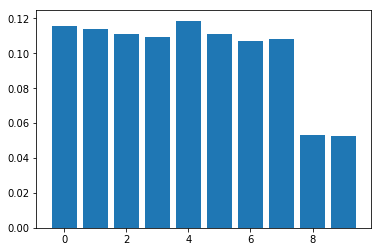

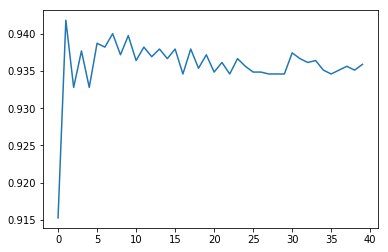

In [74]:
# X will have the numeric data, Y will have the target class
X = np.array(test_df.iloc[:, 0:10]) 
Y = np.array(test_df['label']) 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

# n_estimators es el numero de arboles
classifier=RandomForestClassifier(n_estimators=50)

# Entrenar
classifier=classifier.fit(X_train, y_train)

# Predecir
predictions=classifier.predict(X_test)

# Obtener metricas de error
confusion_matrix(y_test, predictions)
accuracy_score(y_test, predictions)

# Ver la importancia de cada feature para este algoritmo
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

print(model.feature_importances_)
list(model.feature_importances_)

# Graficar importancia de cada uno
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

# Ver aporte de cada arbol
trees=range(40)
accuracy=np.zeros(40)

for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx + 1)
    classifier=classifier.fit(X_train, y_train)
    predictions=classifier.predict(X_test)
    accuracy[idx]=accuracy_score(y_test, predictions)

plt.cla()
plt.plot(trees, accuracy)

### Prediccion con n arboles (Cuanto mas mejor)

In [76]:
pred_df = pd.merge(matriz_factorizada_df, kaggle_df, how='inner', on='person')

In [77]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19415 entries, 0 to 19414
Data columns (total 12 columns):
0         19415 non-null float64
1         19415 non-null float64
2         19415 non-null float64
3         19415 non-null float64
4         19415 non-null float64
5         19415 non-null float64
6         19415 non-null float64
7         19415 non-null float64
8         19415 non-null float64
9         19415 non-null float64
10        19415 non-null float64
person    19415 non-null object
dtypes: float64(11), object(1)
memory usage: 1.9+ MB


In [78]:
# X will have the numeric data, Y will have the target class
X_train = np.array(test_df.iloc[:, 0:10]) 
y_train = np.array(test_df['label']) 
X_test = np.array(pred_df.iloc[:, 0:10]) 

# n_estimators es el numero de arboles
classifier=RandomForestRegressor(n_estimators=500)

# Entrenar
classifier=classifier.fit(X_train, y_train)

# Predecir
pred_df['label'] = classifier.predict(X_test)
pred_df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,person,label
0,0.012246,4.173003,0.460680,0.075169,0.330923,0.051473,0.196645,0.088076,0.000000,0.000000,0.362159,4886f805,0.016286
1,0.504136,415.139942,29.469066,8.294542,20.183960,2.118978,94.071080,3.625847,188.362517,188.362517,22.719093,0297fc1e,0.086000
2,0.038451,13.102718,1.446480,0.236022,1.039058,0.161617,0.617442,0.276548,0.000000,0.000000,1.137136,2d681dd8,0.270812
3,2.123637,723.656498,79.888345,13.035373,57.386643,8.926049,34.101022,15.273627,0.000000,0.000000,62.803440,cccea85e,0.000000
4,0.220693,177.167198,12.703417,3.533479,8.712720,0.927616,39.567634,1.587270,78.923761,78.923761,9.799070,4c8a8b93,0.130000
5,0.023308,8.698553,0.909451,0.159226,0.650232,0.097968,0.641388,0.167636,0.585208,0.585208,0.713565,29ebb414,0.051000
6,1.650062,586.647979,63.124944,10.649177,45.246288,6.935522,35.105794,11.867578,18.862087,18.862087,49.580223,3dc1950f,0.084000
7,0.281954,96.079455,10.606729,1.730699,7.619191,1.185106,4.527573,2.027871,0.000000,0.000000,8.338376,8ea4c165,0.006000
8,0.115009,39.190758,4.326479,0.705951,3.107864,0.483404,1.846795,0.827167,0.000000,0.000000,3.401219,d8cfe234,0.258000
9,0.408855,152.741192,15.959775,2.796384,11.410176,1.718493,11.306195,2.940565,10.386683,10.386683,12.521933,d6bc64df,0.080000


### Armar el archivo de submit

In [79]:
out_df = pred_df[['person', 'label']]
out_df.set_index('person', inplace=True)
out_df.head()

,label
person,
4886f805,0.016286
0297fc1e,0.086000
2d681dd8,0.270812
cccea85e,0.000000
4c8a8b93,0.130000


In [80]:
out_df.to_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp/submit.csv')